In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from calc_footprint_FFP_adjusted01 import FFP

In [3]:
a = FFP()

In [4]:
output = a.output(zm=9., umean=2, h=5000, ol=-1000, sigmav=0.6, ustar=0.3, wind_dir=210,rs= [0.3,0.5,0.9],crop=False, fig=False)

In [5]:
# [list(np.array(output[8][-1]) + 100)]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [8]:
from matplotlib.path import Path

In [9]:
len(output[8])

3

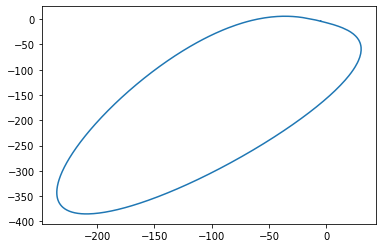

In [10]:
plt.plot(output[8][2], output[9][2])

In [11]:
poly = [(i, j) for i, j in zip(output[8][2], output[9][2])]
poly_shp = Polygon(poly)
poly_mpl = Path(poly)

In [12]:
x = np.arange(-1000, 1000, 10)
y = np.arange(-1000, 1000, 10)
xx, yy = np.meshgrid(x, y)

In [13]:
len(x)

200

In [14]:
x_utm=203917.07880027
y_utm=7545463.6805863


In [15]:
output_x_utm = np.array(output[8][2]) + x_utm
output_y_utm = np.array(output[9][2]) + y_utm

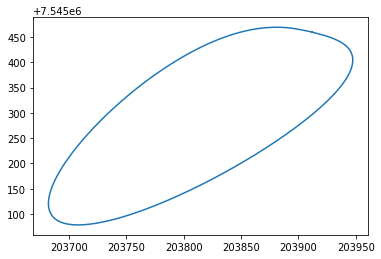

In [16]:
plt.plot(output_x_utm, output_y_utm)

In [17]:
xx, yy = xx.flatten(), yy.flatten()
points = np.vstack((xx,yy)).T

In [18]:
grid = poly_mpl.contains_points(points)

In [19]:
mask = grid.reshape(len(x),len(y))

In [20]:
x2 = x + x_utm
y2 = y + y_utm

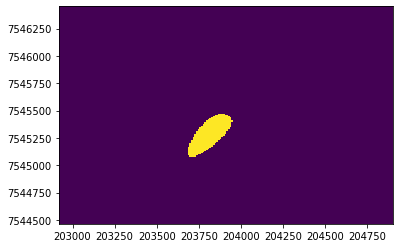

In [21]:
plt.pcolormesh(x2,y2,mask)

In [22]:
from numpy import ma

In [23]:
tif_file = '..\..\iab3_site\IAB1_SIRGAS_23S.tif'
I = plt.imread(tif_file)

In [24]:
import rasterio
import rasterio.plot

In [28]:
np.unique(I)

array([  3,   4,   9,  12,  15,  19,  20,  24,  25,  33, 255], dtype=uint8)

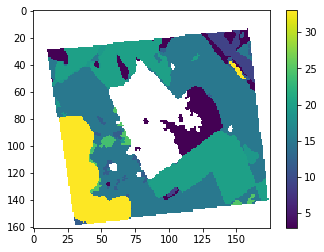

In [34]:
plt.imshow(ma.masked_where((I==4)|(I==255),I))
plt.colorbar()

AttributeError: 'AxesSubplot' object has no attribute 'rasterio'

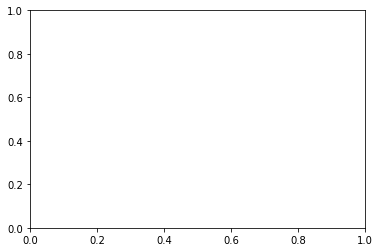

In [33]:
with rasterio.open(tif_file) as src:
    fig, ax = plt.subplots()
    ax.rasterio.plot.show(src)
    ax.plot(output_x_utm, output_y_utm)

In [29]:
import geopandas as gpd

In [31]:
gdf = gpd.GeoDataFrame()